In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing the data
data = pd.read_excel("C:/Users/Admin/Desktop/Data Analyst Assignment 2.xlsx")
data.head()

,SKU,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00,2019-08-08 00:00:00,2019-08-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,...,1929,1948,1929,1987,2027,1926,1926,1849,1904,1828
1,3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
2,3086,891,909,936,889,880,906,870,879,844,...,829,829,812,788,788,772,811,803,763,763
3,3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,...,1719,1805,1895,1895,1990,2030,2050,2132,2111,2027
4,3166,369,354,343,340,330,337,350,343,340,...,335,328,325,319,316,319,329,336,349,352


In [ ]:
#Melting the data wrt SKU to make it effective for data analysing
Sales= data.melt(id_vars=["SKU"], var_name="Date", value_name="Sales").reset_index(drop=True)

In [16]:
#Converting the date column to datatype datettime
Sales.Date = pd.to_datetime(Sales.Date)
Sales.set_index('Date', inplace=True)

In [34]:
monthly_sales_by_SKU = Sales.groupby('SKU').resample('M').sum().reset_index()
monthly_sales_by_SKU

,SKU,Date,Sales
0,2527,2019-08-31,41702
1,2527,2019-09-30,36880
2,2527,2019-10-31,30582
3,2527,2019-11-30,21916
4,2527,2019-12-31,23804
...,...,...,...
2959,WIM51234,2020-03-31,62
2960,WIM51234,2020-04-30,60
2961,WIM51234,2020-05-31,62
2962,WIM51234,2020-06-30,60


In [22]:
Quaterly_Sales_by_SKU = Sales.groupby('SKU').resample('Q').sum().reset_index()
Quaterly_Sales_by_SKU

,SKU,Date,Sales
0,2527,2019-09-30,78582
1,2527,2019-12-31,76302
2,2527,2020-03-31,75979
3,2527,2020-06-30,131890
4,2527,2020-09-30,55826
...,...,...,...
1230,WIM51234,2019-09-30,122
1231,WIM51234,2019-12-31,184
1232,WIM51234,2020-03-31,182
1233,WIM51234,2020-06-30,182


In [18]:
top_three_Monthly_sales_data = Sales.resample('M').sum()['Sales'].nlargest(3)
top_three_Monthly_sales_data

Date
2020-03-31    20234570
2019-12-31    19536270
2020-01-31    19170099
Name: Sales, dtype: int64

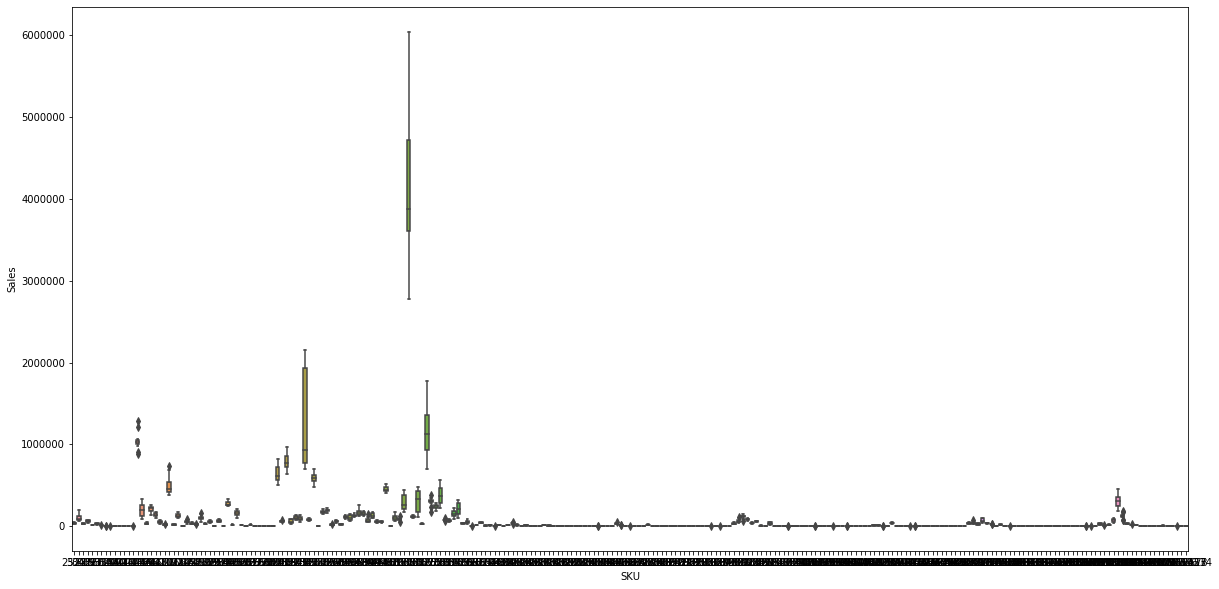

In [67]:
#Calculating the outliers with seaborn
a4_dims = (20, 10)
ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='SKU', y='Sales', data=monthly_sales_by_SKU)